In [1]:
import src.data.O2_FEV1_df as O2_FEV1_df
import src.models.helpers as mh

import matplotlib.pyplot as plt
import networkx as nx

plotsdir = "../../../../PlotsSmartcare/"

In [4]:
O2_FEV1 = O2_FEV1_df.create()


** Loading measurements data **


/Users/tristan.trebaol/Desktop/PhD/Code/phd/src/milestone_model/../data/measurements_data.py:101: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(datadir + "mydata.csv")



* Dropping unnecessary columns from measurements data *
Columns filtered ['User ID', 'UserName', 'Recording Type', 'Date/Time recorded', 'FEV 1', 'Weight in Kg', 'O2 Saturation', 'Pulse (BPM)', 'Rating', 'Temp (deg C)']
Dropping columns {'Sputum sample taken?', 'FEV 1 %', 'Calories', 'Predicted FEV', 'FEV 10', 'Activity - Points', 'Activity - Steps'}

* Renaming columns *
Renamed columns {'Date/Time recorded': 'Date recorded', 'FEV 1': 'FEV1', 'Weight in Kg': 'Weight (kg)'}

* Applying data sanity checks *

FEV1
Dropping 1 entries with FEV1 = 3.45 for user Kings004

Weight (kg)
Dropping 2 entries with Weight (kg) = 6.0 for user Papworth033
Dropping 1 entries with Weight (kg) = 0.55 for user Kings013
Dropping 1 entries with Weight (kg) = 8.262500000000001 for user Papworth017
Dropping 1 entries with Weight (kg) = 1056.0 for user leeds01730
Dropping 1 entries with Weight (kg) = 20.0 for user Papworth019
Warning - ID PapworthSummer has Weight (28.9375) outside 30-122 kg range
Warning - I

/Applications/anaconda3/envs/phd/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/tristan.trebaol/Desktop/PhD/Code/phd/src/milestone_model/../data/patient_data.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Height.loc[df.ID == "60"] = tmp * 100
/Applications/anaconda3/envs/phd/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():



* Correcting patient data *
ID 60: Corrected height 60 from 1.63 to 163.0
ID 66: Corrected height for ID 66 from 1.62 to 162.0
Replace Age by calculate age
Drop FEV1 Set As and Predicted FEV1
Compute Calculated Predicted FEV1

* Applying data sanity checks *
Loaded patient data with 147 entries (147 initially)

** Loading antibiotics data **

* Dropping unnecessary columns from antibiotics data *
Columns filetered: ['ID', 'Antibiotic Name', 'Route', "Home IV's'", 'Start Date', 'Stop Date']
Columns dropped: {'Study Number', 'Antibiotic ID', 'Hospital'}

** Creating DataFrame for O2 FEV1 analysis **
O2 Saturation has 14011 measurements
FEV1 has 9936 measurements
Merged O2 and FEV1 into 9526 entries (initially 14421, removed 4895 NaN)
Asserting that there's only one measurement per ID per day

Created df_O2_FEV1 with 9526 entries (initially 14421, removed 4895)


In [5]:
df_for_ID = O2_FEV1[O2_FEV1.ID == "131"]

# Create model tailored to pat ient
height = df_for_ID.Height.values[0]
age = df_for_ID.Age.values[0]
sex = df_for_ID.Sex.values[0]
HFEV1_prior = model_lung_health.set_HFEV1_prior("gaussian", height, age, sex)
(
    model,
    inference,
    HFEV1,
    prior_HFEV1,
    LD,
    prior_LD,
    UFEV1,
    SAB_list,
    prior_SAB_i,
    FEV1_list,
) = model_lung_health.build_longitudinal_FEV1_side(
    df_for_ID.shape[0], HFEV1_prior=HFEV1_prior
)

*** Building the longitudinal model with LD as shared variable across time ***
Defining gaussian prior with mu = 3.90, sigma = 0.4


<Axes:>

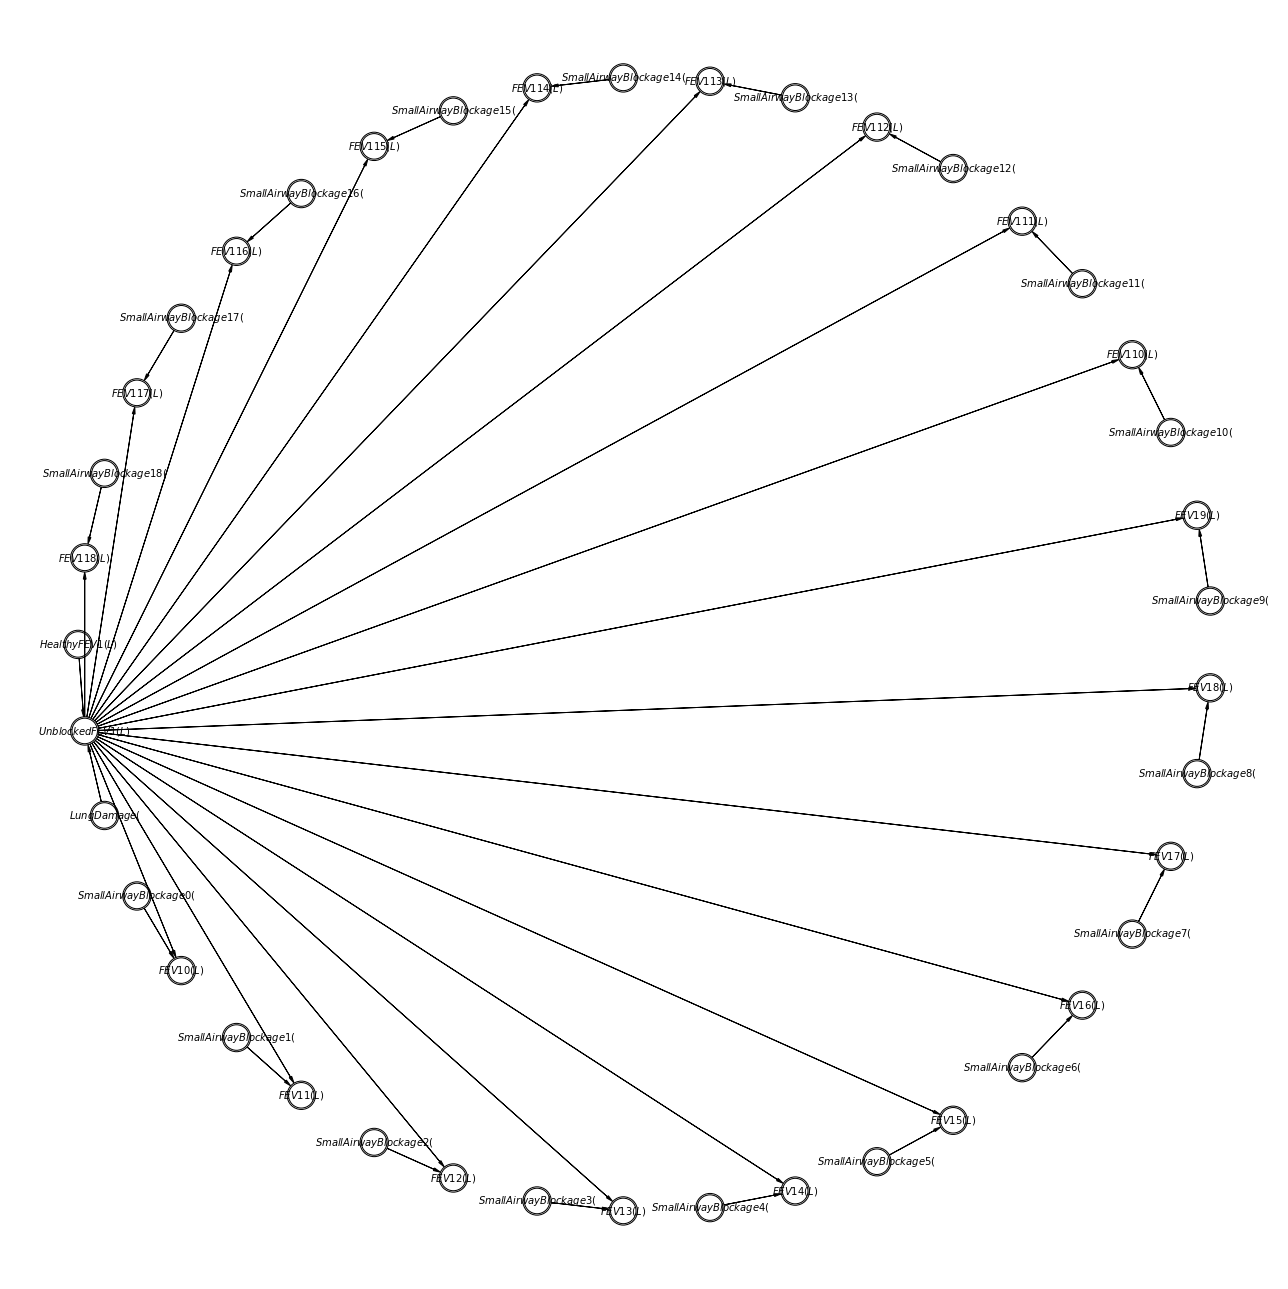

In [6]:
# circular, kamada_kawai, planar, random, shell, sprint,
# spectral, spiral.
model.to_daft("shell", pgm_params={"grid_unit": 20, "observed_style": "inner"}).render()

In [5]:
model.get_cpds()

[<TabularCPD representing P(Healthy FEV1 (L):50) at 0x7fbd727450f0>,
 <TabularCPD representing P(Lung Damage (%):16) at 0x7fbd72746260>,
 <TabularCPD representing P(Unblocked FEV1 (L):58 | Lung Damage (%):16, Healthy FEV1 (L):50) at 0x7fbd72746140>,
 <TabularCPD representing P(Small Airway Blockage 0 (%):16) at 0x7fbd727471f0>,
 <TabularCPD representing P(Small Airway Blockage 1 (%):16) at 0x7fbd72747250>,
 <TabularCPD representing P(Small Airway Blockage 2 (%):16) at 0x7fbd72744520>,
 <TabularCPD representing P(Small Airway Blockage 3 (%):16) at 0x7fbd727470a0>,
 <TabularCPD representing P(Small Airway Blockage 4 (%):16) at 0x7fbd70ac3d90>,
 <TabularCPD representing P(Small Airway Blockage 5 (%):16) at 0x7fbd70ac3490>,
 <TabularCPD representing P(Small Airway Blockage 6 (%):16) at 0x7fbd726d7910>,
 <TabularCPD representing P(Small Airway Blockage 7 (%):16) at 0x7fbd92b6e530>,
 <TabularCPD representing P(Small Airway Blockage 8 (%):16) at 0x7fbd72747a60>,
 <TabularCPD representing P(Sm

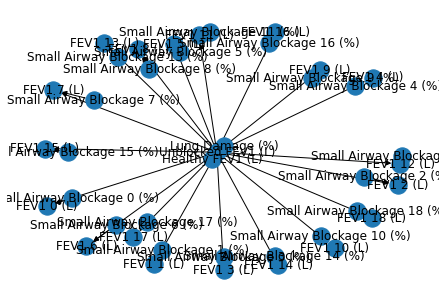

In [11]:
# https://github.com/pgmpy/pgmpy/issues/1016
nx_graph = nx.DiGraph(model.edges())
nx.draw(
    nx_graph,
    with_labels=True,
    #     node_size=2000,
    #     node_color="skyblue",
    #     node_shape="o",
    #     alpha=0.7,
    #     linewidths=5,
)
plt.show()